In [47]:
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
data = pd.read_csv('car.csv')
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [3]:
data.shape

(1727, 7)

In [4]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [5]:
data.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
for col in col_names:
    
    print(data[col].value_counts())   

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [9]:
data['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])
    y1=le.fit_transform(y)


In [20]:
data

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [21]:
X = data.drop(['class'], axis=1)
y = data['class']


In [22]:
X

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0
...,...,...,...,...,...,...
1722,1,1,3,2,1,2
1723,1,1,3,2,1,0
1724,1,1,3,2,0,1
1725,1,1,3,2,0,2


In [23]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1722    1
1723    3
1724    2
1725    1
1726    3
Name: class, Length: 1727, dtype: int64

In [24]:
Y=pd.get_dummies(y).values

In [25]:
Y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [27]:
X_train.shape, X_test.shape

((1157, 6), (570, 6))

In [28]:
#check data types in X_train

X_train.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
dtype: object

In [29]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,3,3,3,0,1,1
48,3,3,1,2,1,2
468,0,3,1,1,2,2
155,3,0,1,2,1,1
1043,2,0,2,2,2,1


In [30]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,0,0,2,0,0,1
932,2,3,2,1,0,1
628,0,0,3,0,0,0
1497,1,0,3,1,1,2
1262,2,1,2,2,1,1


In [31]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam

In [45]:
def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(44, activation='relu', input_shape=(6,)))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0048), metrics=['accuracy'])
    
    return model


model = build_model() 

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 44)                308       
                                                                 
 dense_29 (Dense)            (None, 20)                900       
                                                                 
 dense_30 (Dense)            (None, 16)                336       
                                                                 
 dense_31 (Dense)            (None, 4)                 68        
                                                                 
Total params: 1,612
Trainable params: 1,612
Non-trainable params: 0
_________________________________________________________________


In [48]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
37/37 [==============================] - 0s 7ms/step - loss: 0.0287 - accuracy: 0.9974 - val_loss: 0.1004 - val_accuracy: 0.9649
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9948 - val_loss: 0.1092 - val_accuracy: 0.9561
Epoch 3/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9939 - val_loss: 0.0869 - val_accuracy: 0.9649
Epoch 4/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9974 - val_loss: 0.0976 - val_accuracy: 0.9561
Epoch 5/100
37/37 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9957 - val_loss: 0.0888 - val_accuracy: 0.9667
Epoch 6/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0249 - accuracy: 0.9983 - val_loss: 0.0954 - val_accuracy: 0.9614
Epoch 7/100
37/37 [==============================] - 0s 6ms/step - loss: 0.0341 - accuracy: 0.9888 - val_loss: 0.0915 - val_accuracy: 0.9684
Epoch 8/100
3

Epoch 59/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0727 - val_accuracy: 0.9719
Epoch 60/100
37/37 [==============================] - 0s 5ms/step - loss: 0.0091 - accuracy: 0.9991 - val_loss: 0.0804 - val_accuracy: 0.9667
Epoch 61/100
37/37 [==============================] - 0s 6ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.0719 - val_accuracy: 0.9772
Epoch 62/100
37/37 [==============================] - 0s 7ms/step - loss: 0.0082 - accuracy: 0.9991 - val_loss: 0.0846 - val_accuracy: 0.9702
Epoch 63/100
37/37 [==============================] - 0s 7ms/step - loss: 0.0133 - accuracy: 0.9974 - val_loss: 0.0797 - val_accuracy: 0.9684
Epoch 64/100
37/37 [==============================] - 0s 6ms/step - loss: 0.0103 - accuracy: 0.9991 - val_loss: 0.0744 - val_accuracy: 0.9719
Epoch 65/100
37/37 [==============================] - 0s 6ms/step - loss: 0.0103 - accuracy: 0.9983 - val_loss: 0.0761 - val_accuracy: 0.9719
Epoch 

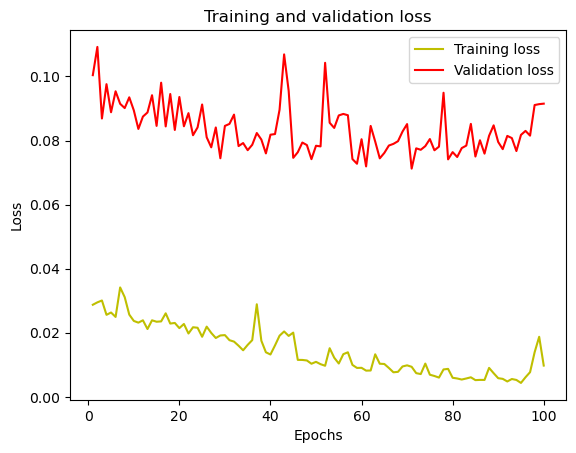

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

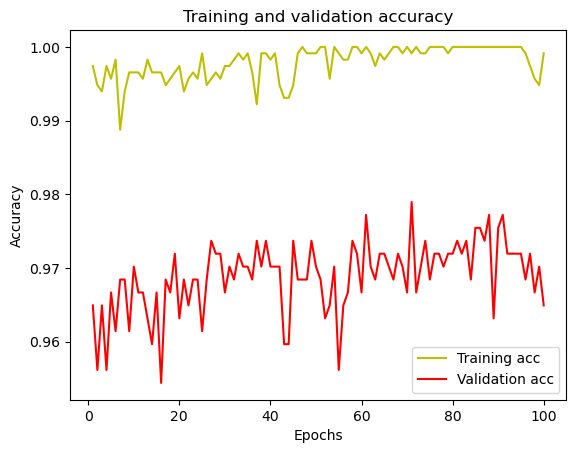

In [51]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [49]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       127
           1       0.88      0.78      0.82        18
           2       0.99      0.98      0.98       399
           3       0.93      0.96      0.94        26

    accuracy                           0.96       570
   macro avg       0.93      0.92      0.92       570
weighted avg       0.97      0.96      0.96       570

[[120   1   5   1]
 [  3  14   0   1]
 [  7   1 391   0]
 [  1   0   0  25]]
